In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [3]:

#with open("../ressources/automode_descriptions_evaluated.pickle", "rb") as file:
#with open("../ressources/automode_evaluated_seed21_n600.pickle", "rb") as file:
#with open("../ressources/automode_evaluated_seed15_n300_24-12-18.pickle", "rb") as file:
#with open("../ressources/automode_evaluated_seed16_n300_24-12-17_targetlights.pickle", "rb") as file:
#with open("../ressources/automode_evaluated_seed17_n600_24-12-20.pickle", "rb") as file:
#with open("../ressources/llm_evaluated_s14s15s16_n300_24_12_20_target.pickle", "rb") as file:
with open("../ressources/llm_evaluated_s17_n600_24-12-20.pickle", "rb") as file:
#with open("../ressources/automode_evaluated_concat_s14s15s16_n300_24-12-18.pickle", "rb") as file:
#with open("../ressources/llm_evaluated_concat_s14n600_s15n600_train_2024-12-12_16.pickle", "rb") as file:
#with open("testdata.pkl", "rb") as file:
    original_df = pickle.load(file)

In [4]:
original_df["type"] = original_df["parameters"].map(lambda x: type(x.objective_params).__name__)
original_df["original_index"] = original_df.index
original_df["z-scores"] = original_df["scores"].map(lambda x: (x - np.mean(x)) / np.std(x) if x is not None else None)
original_df["coeff_of_var"] = original_df["scores"].map(lambda x: x+abs(np.min(x)) + 1 if x is not None else None).map(lambda x: np.std(x)/np.mean(x) if x is not None else None)


/tmp/ipykernel_946917/3181682175.py:3: RuntimeWarning: invalid value encountered in divide
  original_df["z-scores"] = original_df["scores"].map(lambda x: (x - np.mean(x)) / np.std(x) if x is not None else None)


In [5]:
group_dfs = {category: group.reset_index(drop=True) for category, group in original_df.groupby("type")}

for group, df in group_dfs.items():
    old_size = len(df)
    cleaned = df.dropna()
    new_size = len(cleaned)
    print(f" {group}:  {old_size=} {new_size=}: ratio: {new_size/float(old_size)}")
    group_dfs[group] = cleaned

 Aggregation:  old_size=154 new_size=153: ratio: 0.9935064935064936
 Connection:  old_size=158 new_size=155: ratio: 0.9810126582278481
 Distribution:  old_size=128 new_size=111: ratio: 0.8671875
 Foraging:  old_size=160 new_size=156: ratio: 0.975


In [6]:
group_dfs["Aggregation"]

,index,description,configuration,parameters,argos,behavior_tree,scores,avg_score,llm_scores,llm_behavior_tree,llm_avg_score,type,original_index,z-scores,coeff_of_var
0,0,The area is a rectangle with dimensions 2.14 x...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.954545, 1.0, 0.954545, 0.954545, 0.954545, ...",0.977272,"[0.0, 0.0454545, 0.0454545, 0.0, 0.0, 0.045454...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.018182,Aggregation,0,"[-1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1...",0.007752
1,8,"The rectangular space is 3.11 m long, 1.76 m w...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.857143, 0.714286, 0.571429, 0.571429, 0.714...",0.785714,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.000000,Aggregation,8,"[0.48795003647426655, -0.48795003647426655, -1...",0.062103
2,11,A circle with 14 walls forms the structure of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.8, 0.6, 0.68, 0.72, 0.76, 0.76, 0.68, 0.64,...",0.700000,"[0.36, 0.32, 0.36, 0.28, 0.36, 0.56, 0.32, 0.4...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.372000,Aggregation,11,"[1.666666666666668, -1.666666666666666, -0.333...",0.026087
3,12,The environment features a rectangle with dime...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.8125, 0.8125, 0.6875, 0.6875, 0.6875, 0.812...",0.775000,"[0.625, 0.4375, 0.625, 0.5, 0.625, 0.5625, 0.6...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.600000,Aggregation,12,"[0.6546536707079766, 0.6546536707079766, -1.52...",0.023262
4,15,The environment is a circular arena with radiu...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.5, 0.375, 0.25, 0.375, 0.5, 0.375, 0.5, 0.2...",0.350000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.000000,Aggregation,15,"[1.0289915108550534, 0.171498585142509, -0.685...",0.107981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,583,The environment is a circle made out of 13 wal...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.5, 0.5, 0.2, 0.5, 0.0, 0.4, 0.5, 0.4, 0.6, ...",0.380000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.000000,Aggregation,583,"[0.6750527405556143, 0.6750527405556143, -1.01...",0.128814
150,587,"With a radius of 4.05 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.25, 0.416667, 0.416667, 0.25, 0.333333, 0.4...",0.362500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.000000,Aggregation,587,"[-1.5069941716180801, 0.7255942515025474, 0.72...",0.046296
151,594,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-c

In [7]:
try:
    print(group_dfs["Foraging"][group_dfs["Foraging"]["avg_score"] > 4000].iloc[0].behavior_tree)
except:
    print("not found")

not found


## Distribution of Scores

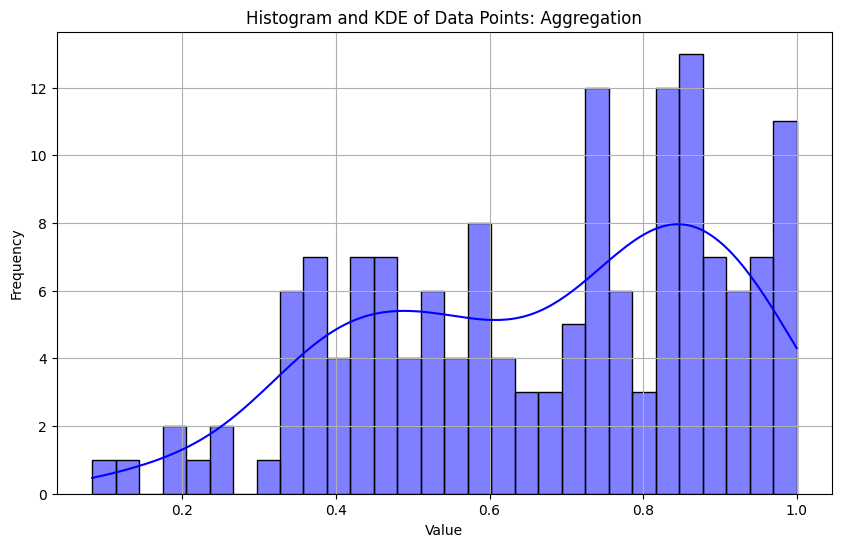

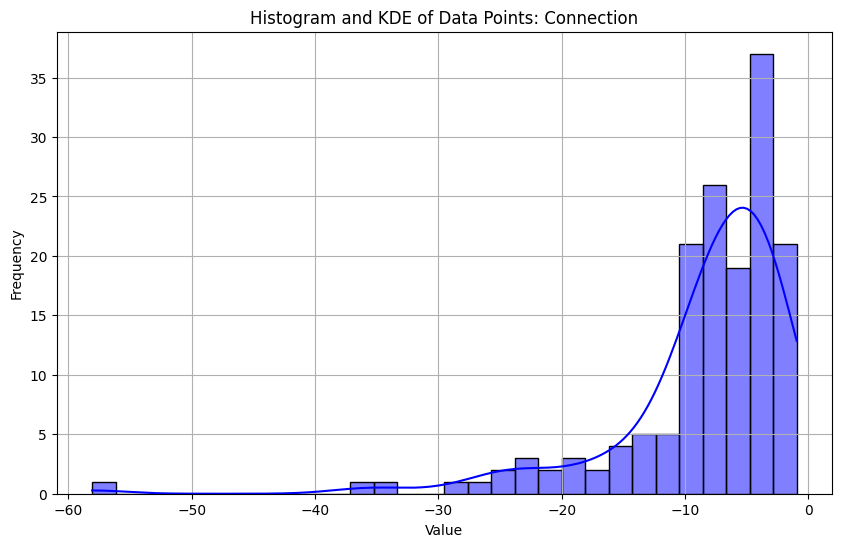

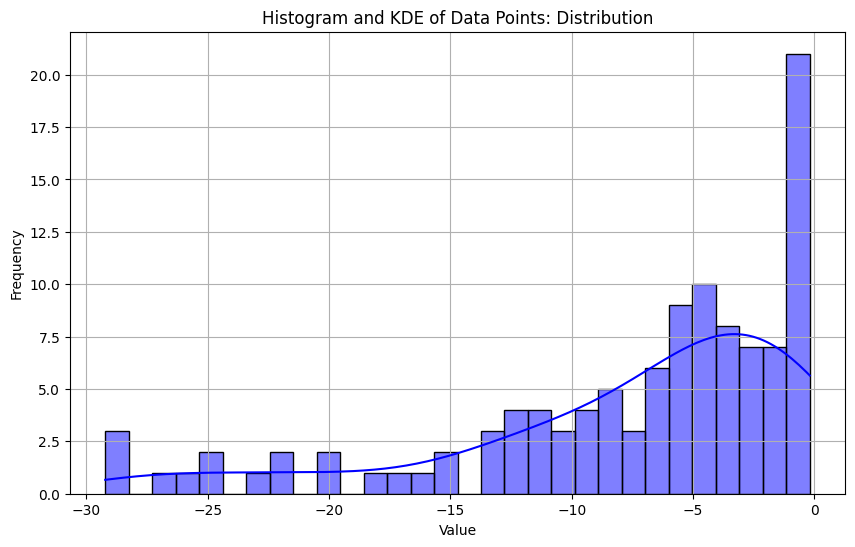

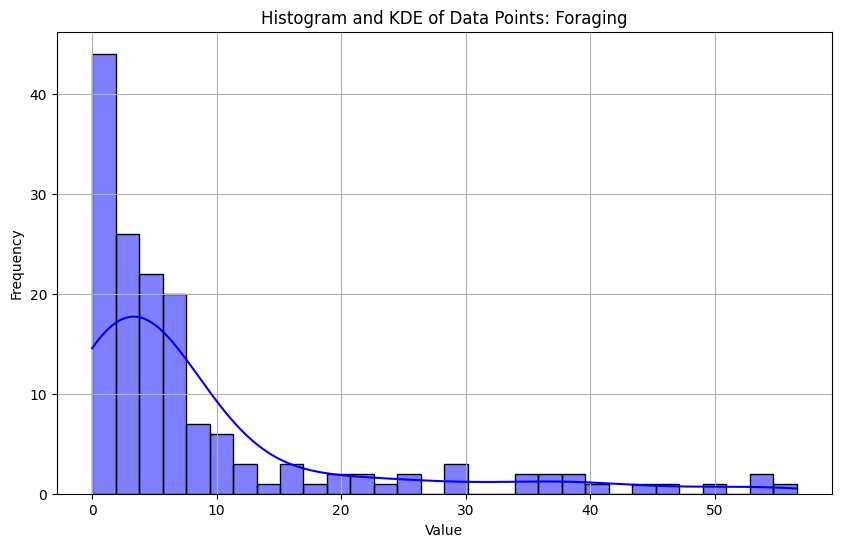

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for group, df in group_dfs.items():
    # Sample data
    data = df.avg_score.to_numpy()

    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=30, kde=True, color='blue', alpha=0.5)
    plt.title(f"Histogram and KDE of Data Points: {group}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()


In [9]:
import plotly.express as px
import numpy as np

# Sample data
data = group_dfs["Aggregation"].avg_score.to_numpy()

# Create a KDE plot
# fig = px.density_contour(x=data, title='KDE Plot of Data Points', labels={'x': 'Value'})
# fig.update_layout(xaxis_title='Value', yaxis_title='Density')
# fig.show()

# Create a histogram
fig = px.histogram(data, nbins=30, title='Histogram of Data Points', labels={'value': 'Value'})
fig.update_layout(xaxis_title='Value', yaxis_title='Frequency')
fig.show()


## Coefficient of Variation Analysis

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



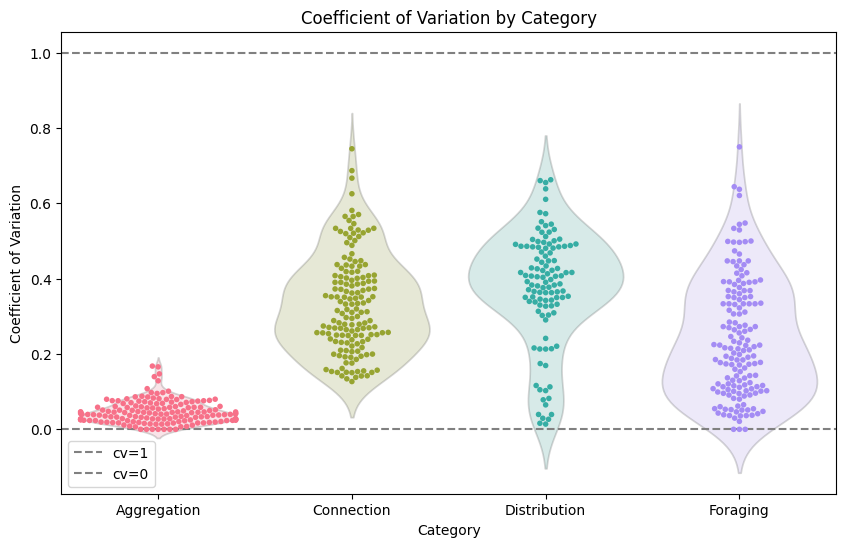

In [10]:
combined_df = pd.concat(
    [df.assign(category=category) for category, df in group_dfs.items()],
    ignore_index=True
)

plt.figure(figsize=(10, 6))

# Define a color palette for the categories
palette = sns.color_palette("husl", n_colors=len(combined_df['category'].unique()))

# Use violinplot to show the distribution of the data with colors
sns.violinplot(data=combined_df, x='category', y='coeff_of_var', inner=None, palette=palette, alpha=0.21, hue='category')

# Overlay swarm plot to scatter individual points with colors
sns.swarmplot(data=combined_df, x='category', y='coeff_of_var', alpha=1.0, size=4, hue='category', palette=palette)

# Add a horizontal line at y=1 (solid and black)
plt.axhline(y=1, color='grey', linestyle='--', label='cv=1')
plt.axhline(y=0, color='grey', linestyle='--', label='cv=0')

# Step 4: Customize the plot
plt.title('Coefficient of Variation by Category')
plt.xlabel('Category')
plt.ylabel('Coefficient of Variation')
plt.legend()  # Show legend for the horizontal line
plt.show()

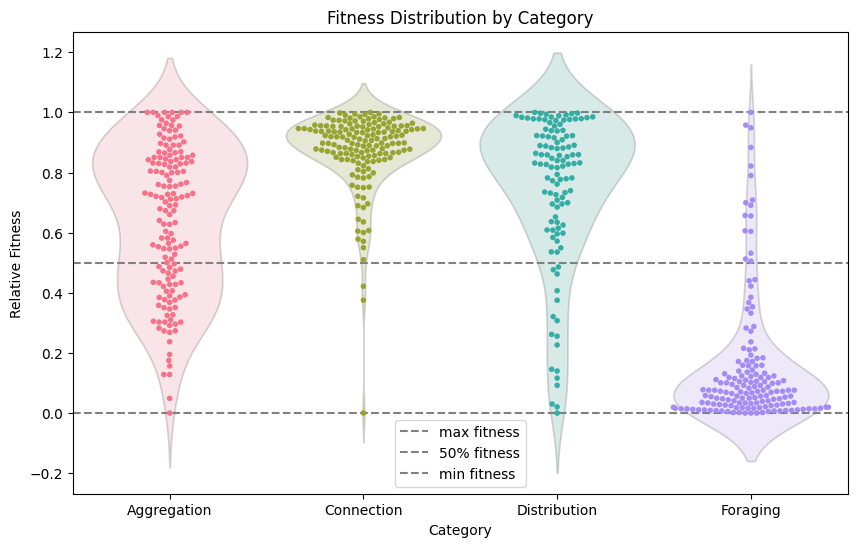

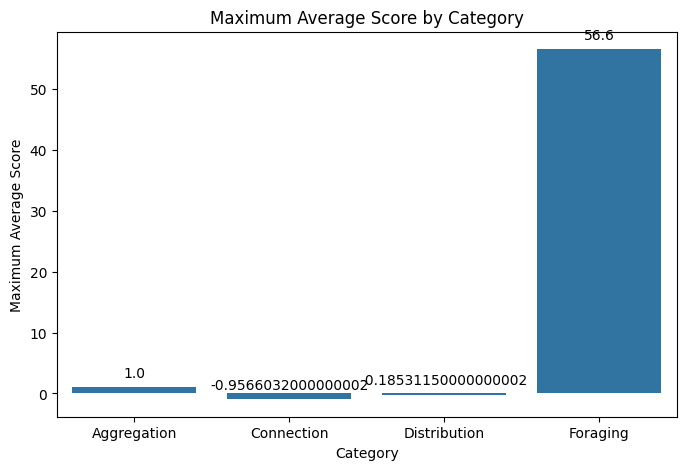

In [11]:
# Step 1: Calculate the max and min avg_score for each category
min_max_values = combined_df.groupby("category")["avg_score"].agg(['min', 'max']).reset_index()

# Step 2: Merge the min and max values back to the original DataFrame
combined_df_scaled = combined_df.merge(min_max_values, on="category")

# Step 3: Scale the avg_score to the range [0, 1]
combined_df_scaled['scaled_avg_score'] = (combined_df_scaled['avg_score'] - combined_df_scaled['min']) / (combined_df_scaled['max'] - combined_df_scaled['min'])

plt.figure(figsize=(10, 6))

# Define a color palette for the categories
palette = sns.color_palette("husl", n_colors=len(combined_df_scaled['category'].unique()))

# Use violinplot to show the distribution of the data with colors
sns.violinplot(data=combined_df_scaled, x='category', y='scaled_avg_score', inner=None, palette=palette, alpha=0.21, hue='category')

# Overlay swarm plot to scatter individual points with colors
sns.swarmplot(data=combined_df_scaled, x='category', y='scaled_avg_score', alpha=1.0, size=4, hue='category', palette=palette)

# Add a horizontal line at y=1 (solid and black)
plt.axhline(y=1, color='grey', linestyle='--', label='max fitness')
plt.axhline(y=0.5, color='grey', linestyle='--', label='50% fitness')
plt.axhline(y=0, color='grey', linestyle='--', label='min fitness')

# Step 4: Customize the plot
plt.title('Fitness Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Relative Fitness')
plt.legend()  # Show legend for the horizontal line
plt.show()

# Step 1: Calculate the maximum avg_score for each category
max_values = combined_df_scaled.groupby("category")["avg_score"].max().reset_index()
max_values.rename(columns={"avg_score": "max_avg_score"}, inplace=True)

# Step 2: Create a bar plot using Seaborn
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=max_values, x='category', y='max_avg_score', legend=False)

# Adding titles and labels
plt.title('Maximum Average Score by Category')
plt.xlabel('Category')
plt.ylabel('Maximum Average Score')

# Step 3: Annotate the bars with their respective values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # Offset text
                      textcoords='offset points')

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



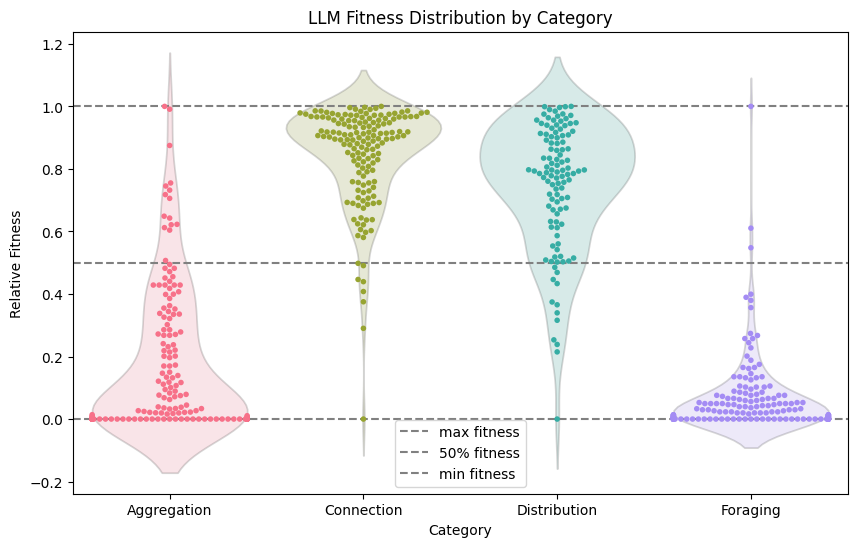

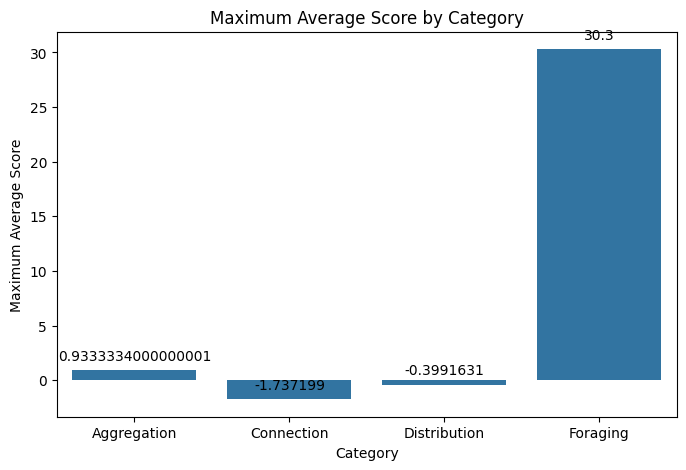

In [12]:
if "llm_avg_score" in combined_df.keys():
    scoreidx = "llm_avg_score"
    # Step 1: Calculate the max and min avg_score for each category
    min_max_values = combined_df.groupby("category")[scoreidx].agg(['min', 'max']).reset_index()

    # Step 2: Merge the min and max values back to the original DataFrame
    combined_df_scaled = combined_df.merge(min_max_values, on="category")

    # Step 3: Scale the avg_score to the range [0, 1]
    combined_df_scaled['scaled_avg_score'] = (combined_df_scaled[scoreidx] - combined_df_scaled['min']) / (combined_df_scaled['max'] - combined_df_scaled['min'])

    plt.figure(figsize=(10, 6))

    # Define a color palette for the categories
    palette = sns.color_palette("husl", n_colors=len(combined_df_scaled['category'].unique()))

    # Use violinplot to show the distribution of the data with colors
    sns.violinplot(data=combined_df_scaled, x='category', y='scaled_avg_score', inner=None, palette=palette, alpha=0.21, hue='category')

    # Overlay swarm plot to scatter individual points with colors
    sns.swarmplot(data=combined_df_scaled, x='category', y='scaled_avg_score', alpha=1.0, size=4, hue='category', palette=palette)

    # Add a horizontal line at y=1 (solid and black)
    plt.axhline(y=1, color='grey', linestyle='--', label='max fitness')
    plt.axhline(y=0.5, color='grey', linestyle='--', label='50% fitness')
    plt.axhline(y=0, color='grey', linestyle='--', label='min fitness')

    # Step 4: Customize the plot
    plt.title('LLM Fitness Distribution by Category')
    plt.xlabel('Category')
    plt.ylabel('Relative Fitness')
    plt.legend()  # Show legend for the horizontal line
    plt.show()

    # Step 1: Calculate the maximum avg_score for each category
    max_values = combined_df_scaled.groupby("category")[scoreidx].max().reset_index()
    max_values.rename(columns={scoreidx: "max_avg_score"}, inplace=True)

    # Step 2: Create a bar plot using Seaborn
    plt.figure(figsize=(8, 5))
    bar_plot = sns.barplot(data=max_values, x='category', y='max_avg_score', legend=False)

    # Adding titles and labels
    plt.title('Maximum Average Score by Category')
    plt.xlabel('Category')
    plt.ylabel('Maximum Average Score')

    # Step 3: Annotate the bars with their respective values
    for p in bar_plot.patches:
        bar_plot.annotate(f'{p.get_height()}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 5),  # Offset text
                        textcoords='offset points')

In [13]:
topn = 25
for group, df in group_dfs.items():
    sorted_df = df.sort_values(by="avg_score", ascending=True)
    for index, row in sorted_df.head(topn).iterrows():
        print(group, "\t",f"{row.original_index:04}", f"{row.avg_score:07.2f}")

Aggregation 	 0125 0000.08
Aggregation 	 0044 0000.13
Aggregation 	 0295 0000.20
Aggregation 	 0595 0000.20
Aggregation 	 0246 0000.23
Aggregation 	 0083 0000.24
Aggregation 	 0360 0000.26
Aggregation 	 0354 0000.30
Aggregation 	 0104 0000.33
Aggregation 	 0110 0000.33
Aggregation 	 0291 0000.33
Aggregation 	 0240 0000.34
Aggregation 	 0015 0000.35
Aggregation 	 0464 0000.35
Aggregation 	 0373 0000.36
Aggregation 	 0043 0000.36
Aggregation 	 0101 0000.36
Aggregation 	 0587 0000.36
Aggregation 	 0133 0000.37
Aggregation 	 0583 0000.38
Aggregation 	 0289 0000.38
Aggregation 	 0533 0000.40
Aggregation 	 0432 0000.40
Aggregation 	 0485 0000.40
Aggregation 	 0192 0000.41
Connection 	 0223 -058.08
Connection 	 0591 -036.64
Connection 	 0211 -033.99
Connection 	 0146 -028.95
Connection 	 0496 -026.66
Connection 	 0348 -025.45
Connection 	 0384 -025.04
Connection 	 0423 -023.79
Connection 	 0290 -023.51
Connection 	 0502 -023.39
Connection 	 0221 -021.77
Connection 	 0092 -021.26
Connection 	 

In [14]:
topn = 25
for group, df in group_dfs.items():
    sorted_df = df.sort_values(by="llm_avg_score", ascending=True)
    for index, row in sorted_df.head(topn).iterrows():
        print(group, "\t",f"{row.original_index:04}", f"{row.llm_avg_score:07.2f}")

Aggregation 	 0008 0000.00
Aggregation 	 0015 0000.00
Aggregation 	 0016 0000.00
Aggregation 	 0043 0000.00
Aggregation 	 0033 0000.00
Aggregation 	 0032 0000.00
Aggregation 	 0031 0000.00
Aggregation 	 0030 0000.00
Aggregation 	 0044 0000.00
Aggregation 	 0083 0000.00
Aggregation 	 0107 0000.00
Aggregation 	 0104 0000.00
Aggregation 	 0084 0000.00
Aggregation 	 0079 0000.00
Aggregation 	 0078 0000.00
Aggregation 	 0125 0000.00
Aggregation 	 0192 0000.00
Aggregation 	 0159 0000.00
Aggregation 	 0213 0000.00
Aggregation 	 0202 0000.00
Aggregation 	 0167 0000.00
Aggregation 	 0392 0000.00
Aggregation 	 0360 0000.00
Aggregation 	 0356 0000.00
Aggregation 	 0354 0000.00
Connection 	 0223 -105.04
Connection 	 0094 -075.07
Connection 	 0362 -066.29
Connection 	 0086 -062.91
Connection 	 0221 -059.65
Connection 	 0247 -058.92
Connection 	 0211 -054.35
Connection 	 0591 -053.59
Connection 	 0218 -045.05
Connection 	 0178 -044.43
Connection 	 0381 -043.35
Connection 	 0348 -042.78
Connection 	 

In [15]:
df.original_index

0        7
1       10
2       13
3       14
4       17
      ... 
155    586
156    588
157    589
158    592
159    593
Name: original_index, Length: 156, dtype: int64

In [16]:
# for line in df[][0].argos.split("\n"):
#     if "objective" in line:
#         print(line)

In [17]:
(df.original_index == 3).any()

np.False_